In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 
%matplotlib inline
import geopandas as gpd

from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

In [2]:
#importing the data
df = pd.read_csv('covid_19_data.csv')

In [3]:
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9117 entries, 0 to 9116
Data columns (total 8 columns):
SNo                9117 non-null int64
ObservationDate    9117 non-null object
Province/State     5029 non-null object
Country/Region     9117 non-null object
Last Update        9117 non-null object
Confirmed          9117 non-null float64
Deaths             9117 non-null float64
Recovered          9117 non-null float64
dtypes: float64(3), int64(1), object(4)
memory usage: 569.9+ KB


In [5]:
df['Total_confirmed']= df['Confirmed'].cumsum()
df['Total_Deaths']= df['Deaths'].cumsum()
df['Total_Recovered']= df['Recovered'].cumsum()

In [6]:
df.tail(10)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Total_confirmed,Total_Deaths,Total_Recovered
9107,9108,03/26/2020,Virginia,US,2020-03-26 23:53:24,466.0,10.0,0.0,6985334.0,262328.0,2325865.0
9108,9109,03/26/2020,Washington,US,2020-03-26 23:53:24,3207.0,150.0,0.0,6988541.0,262478.0,2325865.0
9109,9110,03/26/2020,West Virginia,US,2020-03-26 23:53:24,52.0,0.0,0.0,6988593.0,262478.0,2325865.0
9110,9111,03/26/2020,Western Australia,Australia,2020-03-26 23:53:24,231.0,2.0,1.0,6988824.0,262480.0,2325866.0
9111,9112,03/26/2020,Wisconsin,US,2020-03-26 23:53:24,728.0,10.0,0.0,6989552.0,262490.0,2325866.0
9112,9113,03/26/2020,Wyoming,US,2020-03-26 23:53:24,53.0,0.0,0.0,6989605.0,262490.0,2325866.0
9113,9114,03/26/2020,Xinjiang,Mainland China,2020-03-26 23:53:24,76.0,3.0,73.0,6989681.0,262493.0,2325939.0
9114,9115,03/26/2020,Yukon,Canada,2020-03-26 23:53:24,3.0,0.0,0.0,6989684.0,262493.0,2325939.0
9115,9116,03/26/2020,Yunnan,Mainland China,2020-03-26 23:53:24,178.0,2.0,172.0,6989862.0,262495.0,2326111.0
9116,9117,03/26/2020,Zhejiang,Mainland China,2020-03-26 23:53:24,1243.0,1.0,1222.0,6991105.0,262496.0,2327333.0


In [7]:
#want to remove double date points so combine the data of those frames
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9117 entries, 0 to 9116
Data columns (total 11 columns):
SNo                9117 non-null int64
ObservationDate    9117 non-null datetime64[ns]
Province/State     5029 non-null object
Country/Region     9117 non-null object
Last Update        9117 non-null object
Confirmed          9117 non-null float64
Deaths             9117 non-null float64
Recovered          9117 non-null float64
Total_confirmed    9117 non-null float64
Total_Deaths       9117 non-null float64
Total_Recovered    9117 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(1), object(3)
memory usage: 783.6+ KB


In [9]:
#df['Observation Day'] = df['ObservationDate'].dt.day

In [10]:
#df.head()

/Users/Brittney/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


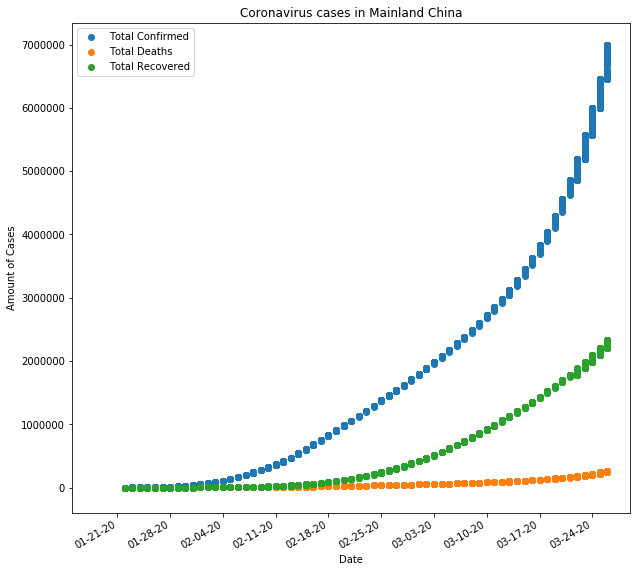

In [11]:
x_1 = df['ObservationDate']
y_1 = df['Total_confirmed']

x_2 = df['ObservationDate']
y_2 = df['Total_Deaths']

x_3 = df['ObservationDate']
y_3 = df['Total_Recovered']

#x_points_1 = pd.to_datetime(x_1)
#x_points_2 = pd.to_datetime(x_2)
#x_points_3 = pd.to_datetime(x_3)

fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(x_1,y_1)
ax.scatter(x_2,y_2)
ax.scatter(x_3,y_3)

ax.set(xlabel="Date",
       ylabel="Amount of Cases",
       title="Coronavirus cases in Mainland China")
ax.legend(('Total Confirmed','Total Deaths','Total Recovered'))

# rotate and align the tick labels so they look better
fig.autofmt_xdate()
plt.xlim([datetime.date(2020, 1, 15), datetime.date(2020, 3, 29)])

# Define the date format
date_form = DateFormatter("%m-%d-%y")
ax.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each week using (interval=1) 
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))


plt.show()

In [12]:
df['Date']=df['ObservationDate'].map(datetime.datetime.toordinal)
df['Number_Date'] = (1 + df['Date'] - df['Date'].min())

#df['Observation Day'] = df['ObservationDate'].dt.day
#df['Observation Week'] = df['ObservationDate'].dt.week

In [30]:
df.tail()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Total_confirmed,Total_Deaths,Total_Recovered,Date,Number_Date,recovered/confirmed,death/confirmed
9112,9113,2020-03-26,Wyoming,US,2020-03-26 23:53:24,53.0,0.0,0.0,6989605.0,262490.0,2325866.0,737510,65,33.276072,3.755434
9113,9114,2020-03-26,Xinjiang,Mainland China,2020-03-26 23:53:24,76.0,3.0,73.0,6989681.0,262493.0,2325939.0,737510,65,33.276755,3.755436
9114,9115,2020-03-26,Yukon,Canada,2020-03-26 23:53:24,3.0,0.0,0.0,6989684.0,262493.0,2325939.0,737510,65,33.276740,3.755434
9115,9116,2020-03-26,Yunnan,Mainland China,2020-03-26 23:53:24,178.0,2.0,172.0,6989862.0,262495.0,2326111.0,737510,65,33.278354,3.755367
9116,9117,2020-03-26,Zhejiang,Mainland China,2020-03-26 23:53:24,1243.0,1.0,1222.0,6991105.0,262496.0,2327333.0,737510,65,33.289916,3.754714


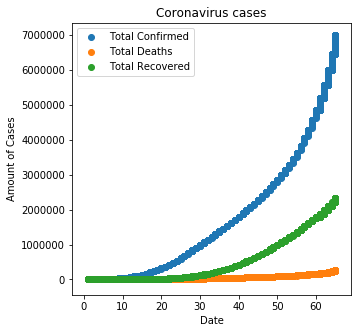

In [26]:
x_1 = df['Number_Date']
y_1 = df['Total_confirmed']

x_2 = df['Number_Date']
y_2 = df['Total_Deaths']

x_3 = df['Number_Date']
y_3 = df['Total_Recovered']

fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(x_1,y_1)
ax.scatter(x_2,y_2)
ax.scatter(x_3,y_3)

ax.set(xlabel="Date",
       ylabel="Amount of Cases",
       title="Coronavirus cases")
ax.legend(('Total Confirmed','Total Deaths','Total Recovered'))
plt.show()

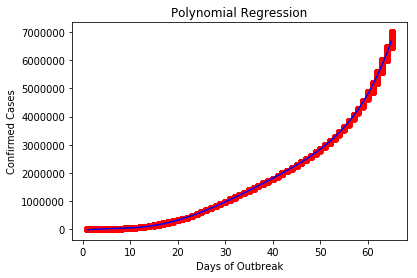

In [64]:
#model 1 prediction of total confirmed cases
#make the data frame for the model 
X = df[['Number_Date']]
y = df[['Total_confirmed']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.linear_model import LinearRegression
lm = LinearRegression()

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 5)
X_poly = poly_reg.fit_transform(X)
poly_reg.fit(X_poly, y)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)
predictions = lin_reg_2.predict(poly_reg.fit_transform(X))

#plotting model and fit
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Polynomial Regression')
plt.xlabel('Days of Outbreak')
plt.ylabel('Confirmed Cases')
plt.show()

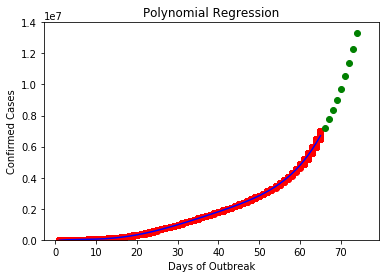

In [67]:
#adding new predicted data points from using model 1
x_new = np.array([66,67,68,69,70,71,72,73,74,75])
predict_newdata = lin_reg_2.predict(poly_reg.fit_transform(x_new.reshape(-1,1)))

#plotting model and fit
plt.scatter(X, y, color = 'red')
plt.scatter(x_new,predict_newdata,color = 'green')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.ylim(0,14000000)
plt.title('Polynomial Regression')
plt.xlabel('Days of Outbreak')
plt.ylabel('Confirmed Cases')
plt.show()

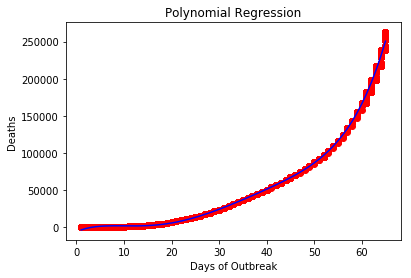

In [28]:
#make the data frame for the model 
X = df[['Number_Date']]
y = df[['Total_Deaths']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.linear_model import LinearRegression
lm = LinearRegression()

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 5)
X_poly = poly_reg.fit_transform(X)
poly_reg.fit(X_poly, y)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

#plotting model and fit
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Polynomial Regression')
plt.xlabel('Days of Outbreak')
plt.ylabel('Deaths')
plt.show()

In [21]:
#ratio of recovered (recovered/confirmed) and ratio of death (death/confirmed)
df['recovered/confirmed'] = df['Total_Recovered']/df['Total_confirmed'] *100
df['death/confirmed'] = df['Total_Deaths']/df['Total_confirmed'] *100

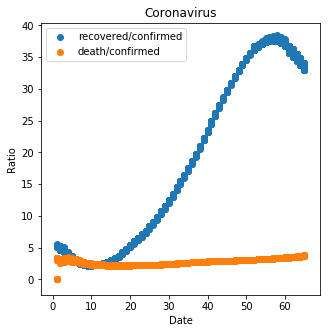

In [27]:
x_1 = df['Number_Date']
y_1 = df['recovered/confirmed']

x_2 = df['Number_Date']
y_2 = df['death/confirmed']

fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(x_1,y_1)
ax.scatter(x_2,y_2)


ax.set(xlabel="Date",
       ylabel="Ratio",
       title="Coronavirus")
ax.legend(('recovered/confirmed','death/confirmed'))
plt.show()